# **1. Configuración del Ambiente**


---


In [73]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [74]:
## Globalizando variables
global df_traffic, resultados, modelo, modelo_clasificacion

# **2. Exploración de Datos**


---

### Retomando Data

In [75]:
df_traffic = pd.read_csv('df_traffic.csv', sep=';')
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  object 
 1   date                12283 non-null  object 
 2   fullVisitorId       12283 non-null  uint64 
 3   sessionId           12283 non-null  object 
 4   visitId             12283 non-null  int64  
 5   visitNumber         12283 non-null  int64  
 6   visitStartTime      12283 non-null  object 
 7   browser             12283 non-null  object 
 8   operatingSystem     12283 non-null  object 
 9   isMobile            12283 non-null  bool   
 10  deviceCategory      12283 non-null  object 
 11  continent           12283 non-null  object 
 12  country             12283 non-null  object 
 13  metro               12283 non-null  object 
 14  city                12283 non-null  object 
 15  networkDomain       12283 non-null  object 
 16  camp

### Desarollo de Feature Engineering

In [76]:
# Crear función para ingeniería de características
def feature_engineering():
    global df_traffic_copy, resultados, modelo, modelo_clasificacion
    df_traffic_copy = df_traffic.copy()
    
    # Crear algunas nuevas variables a partir del atributo 'date'
    df_traffic_copy['date'] = pd.to_datetime(df_traffic_copy['date'])  
    df_traffic_copy['year'] = df_traffic_copy['date'].dt.year
    df_traffic_copy['month'] = df_traffic_copy['date'].dt.month
    df_traffic_copy['quarterMonth'] = df_traffic_copy['date'].dt.quarter
    df_traffic_copy['day'] = df_traffic_copy['date'].dt.day
    df_traffic_copy['weekday'] = df_traffic_copy['date'].dt.weekday
    df_traffic_copy = df_traffic_copy.drop(columns=['date'])

    df_traffic_copy['visitStartTime'] = pd.to_datetime(df_traffic_copy['visitStartTime'])
    
    df_traffic_copy['time_range'] = pd.cut(df_traffic_copy['visitStartTime'].dt.hour, 
                                           bins=[0, 6, 12, 18, 24], 
                                           labels=['madrugada', 'mañana', 'tarde', 'noche'], 
                                           ordered=False).astype('object')
    
    # Eliminar columnas que no vamos a utilizar
    df_traffic_copy.drop(columns=['fullVisitorId', 'sessionId', 'visitId', 'visitStartTime'], inplace=True)
    
    # Aplicar LabelEncoder
    cualitativas = df_traffic_copy.dtypes[df_traffic_copy.dtypes == object].keys()
    for columna in cualitativas:
        lbl = LabelEncoder()
        strings = list(df_traffic_copy[columna].values.astype('str'))
        lbl.fit(strings)
        df_traffic_copy[columna] = lbl.transform(strings)
    
    return df_traffic_copy

In [77]:
df_traffic_copy = feature_engineering().copy()

In [78]:
df_traffic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   channelGrouping     12283 non-null  int32  
 1   visitNumber         12283 non-null  int64  
 2   browser             12283 non-null  int32  
 3   operatingSystem     12283 non-null  int32  
 4   isMobile            12283 non-null  bool   
 5   deviceCategory      12283 non-null  int32  
 6   continent           12283 non-null  int32  
 7   country             12283 non-null  int32  
 8   metro               12283 non-null  int32  
 9   city                12283 non-null  int32  
 10  networkDomain       12283 non-null  int32  
 11  campaign            12283 non-null  int32  
 12  source              12283 non-null  int32  
 13  medium              12283 non-null  int32  
 14  keyword             12283 non-null  int32  
 15  referralPath        12283 non-null  int32  
 16  adCo

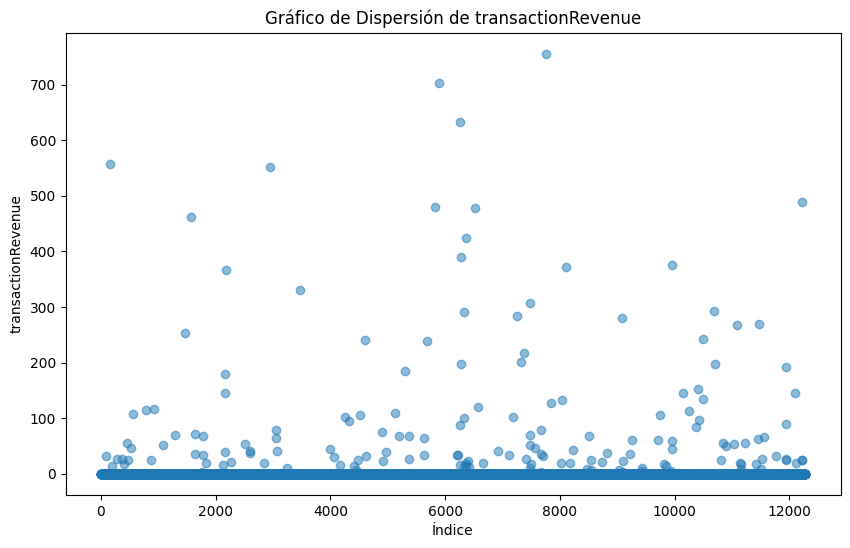

In [79]:
# Grafico de dispersión (antes)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_traffic['transactionRevenue'])), df_traffic['transactionRevenue'], alpha=0.5)
plt.title('Gráfico de Dispersión de transactionRevenue')
plt.xlabel('Índice')
plt.ylabel('transactionRevenue')
plt.show()

<Axes: ylabel='transactionRevenue'>

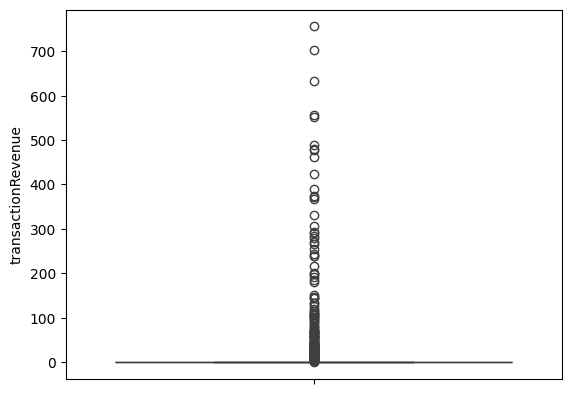

In [80]:
sns.boxplot(df_traffic.transactionRevenue)

In [81]:
df_traffic_copy.sample(5)

,channelGrouping,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,country,metro,city,networkDomain,campaign,source,medium,keyword,referralPath,adContent,hits,pageviews,bounces,newVisits,transactionRevenue,year,month,quarterMonth,day,weekday,time_range
6552,7,1,5,9,False,0,3,56,0,119,1079,0,75,6,85,129,11,1,1,1.0,1.0,0.0,2016,10,4,31,0,1
6730,6,4,5,6,False,0,2,138,32,182,1608,0,48,6,85,0,11,6,5,0.0,0.0,0.0,2016,12,4,22,3,0
3542,2,1,18,6,False,0,2,138,52,295,1608,0,0,0,85,197,11,1,1,1.0,1.0,0.0,2017,4,2,29,5,0
7197,7,1,18,6,False,0,3,55,0,25,3,0,75,6,85,129,11,1,1,1.0,1.0,0.0,2016,8,3,1,0,0
6108,7,1,5,1,True,1,2,138,32,182,134,0,75,6,85,134,11,1,1,1.0,1.0,0.0,2017,7,3,3,0,0


In [82]:
df_traffic = df_traffic_copy.copy()

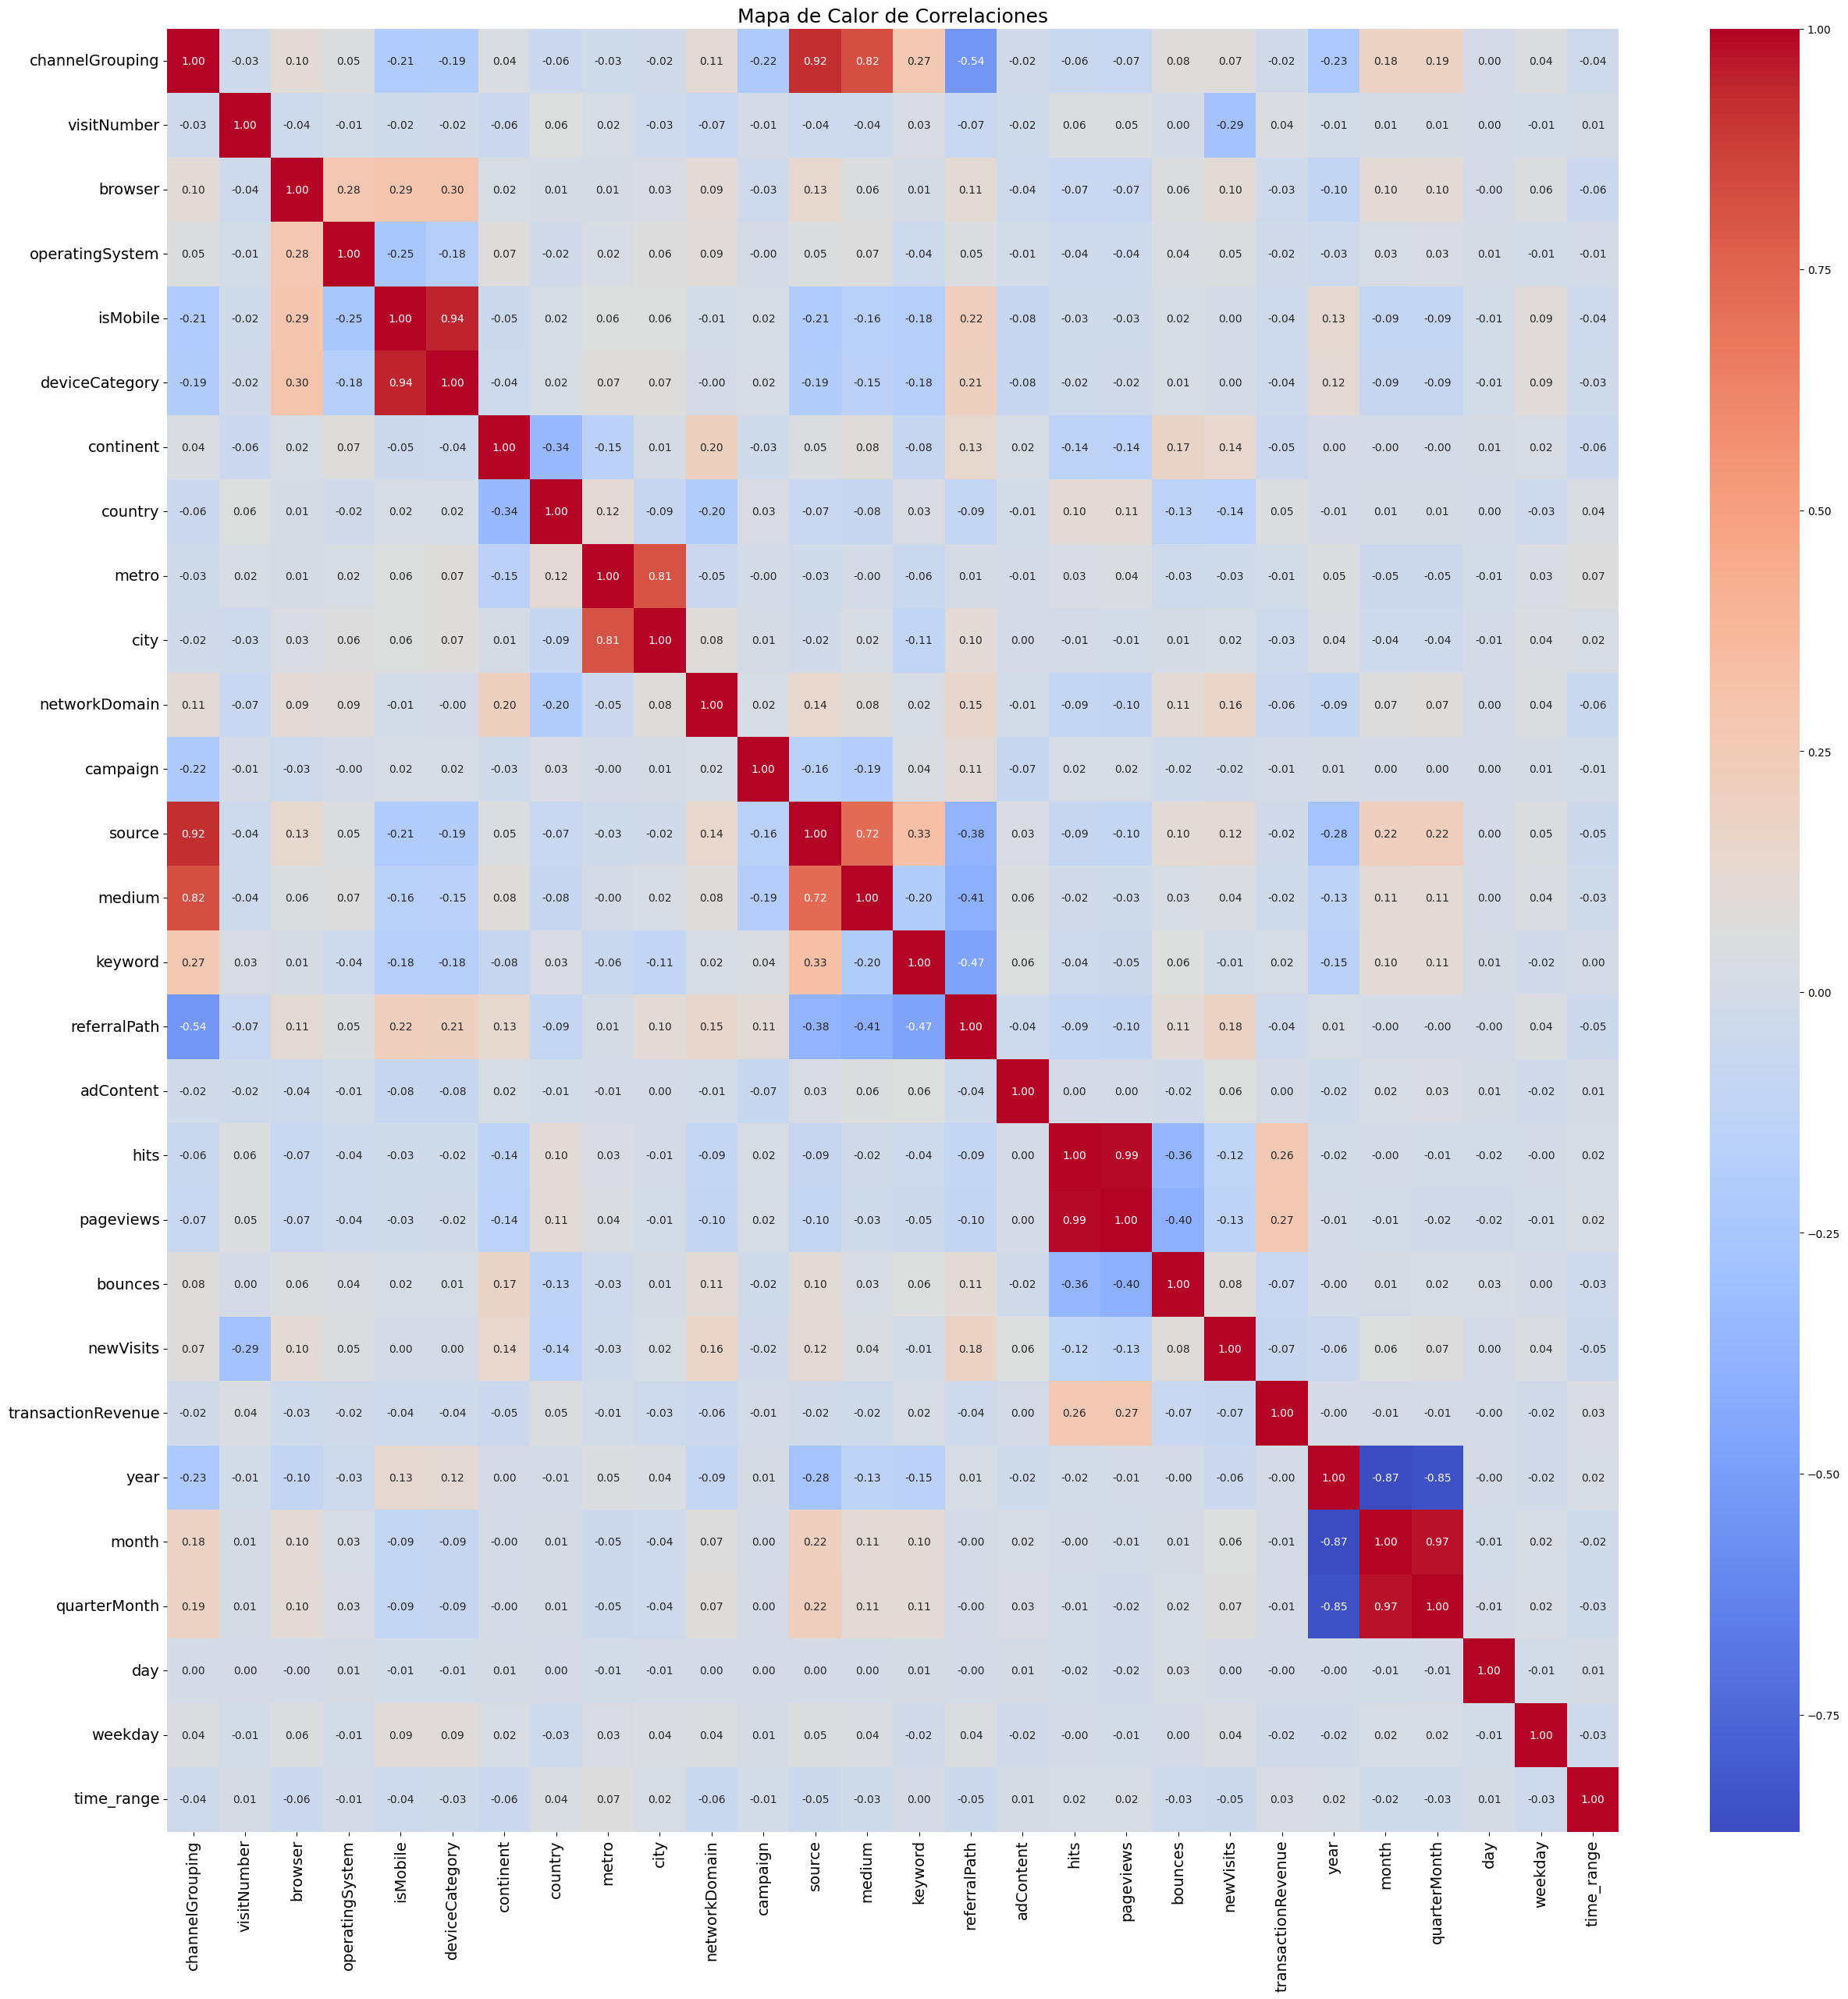

In [83]:
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

### Eliminación de variables con mayor correlacion: month, hits, channelGrouping, year

In [84]:
columns_target = [
    "month", "hits", "channelGrouping", "isMobile", "quarterMonth"
]

df_traffic_copy = df_traffic_copy.drop(columns=columns_target)
df_traffic = df_traffic_copy.copy()

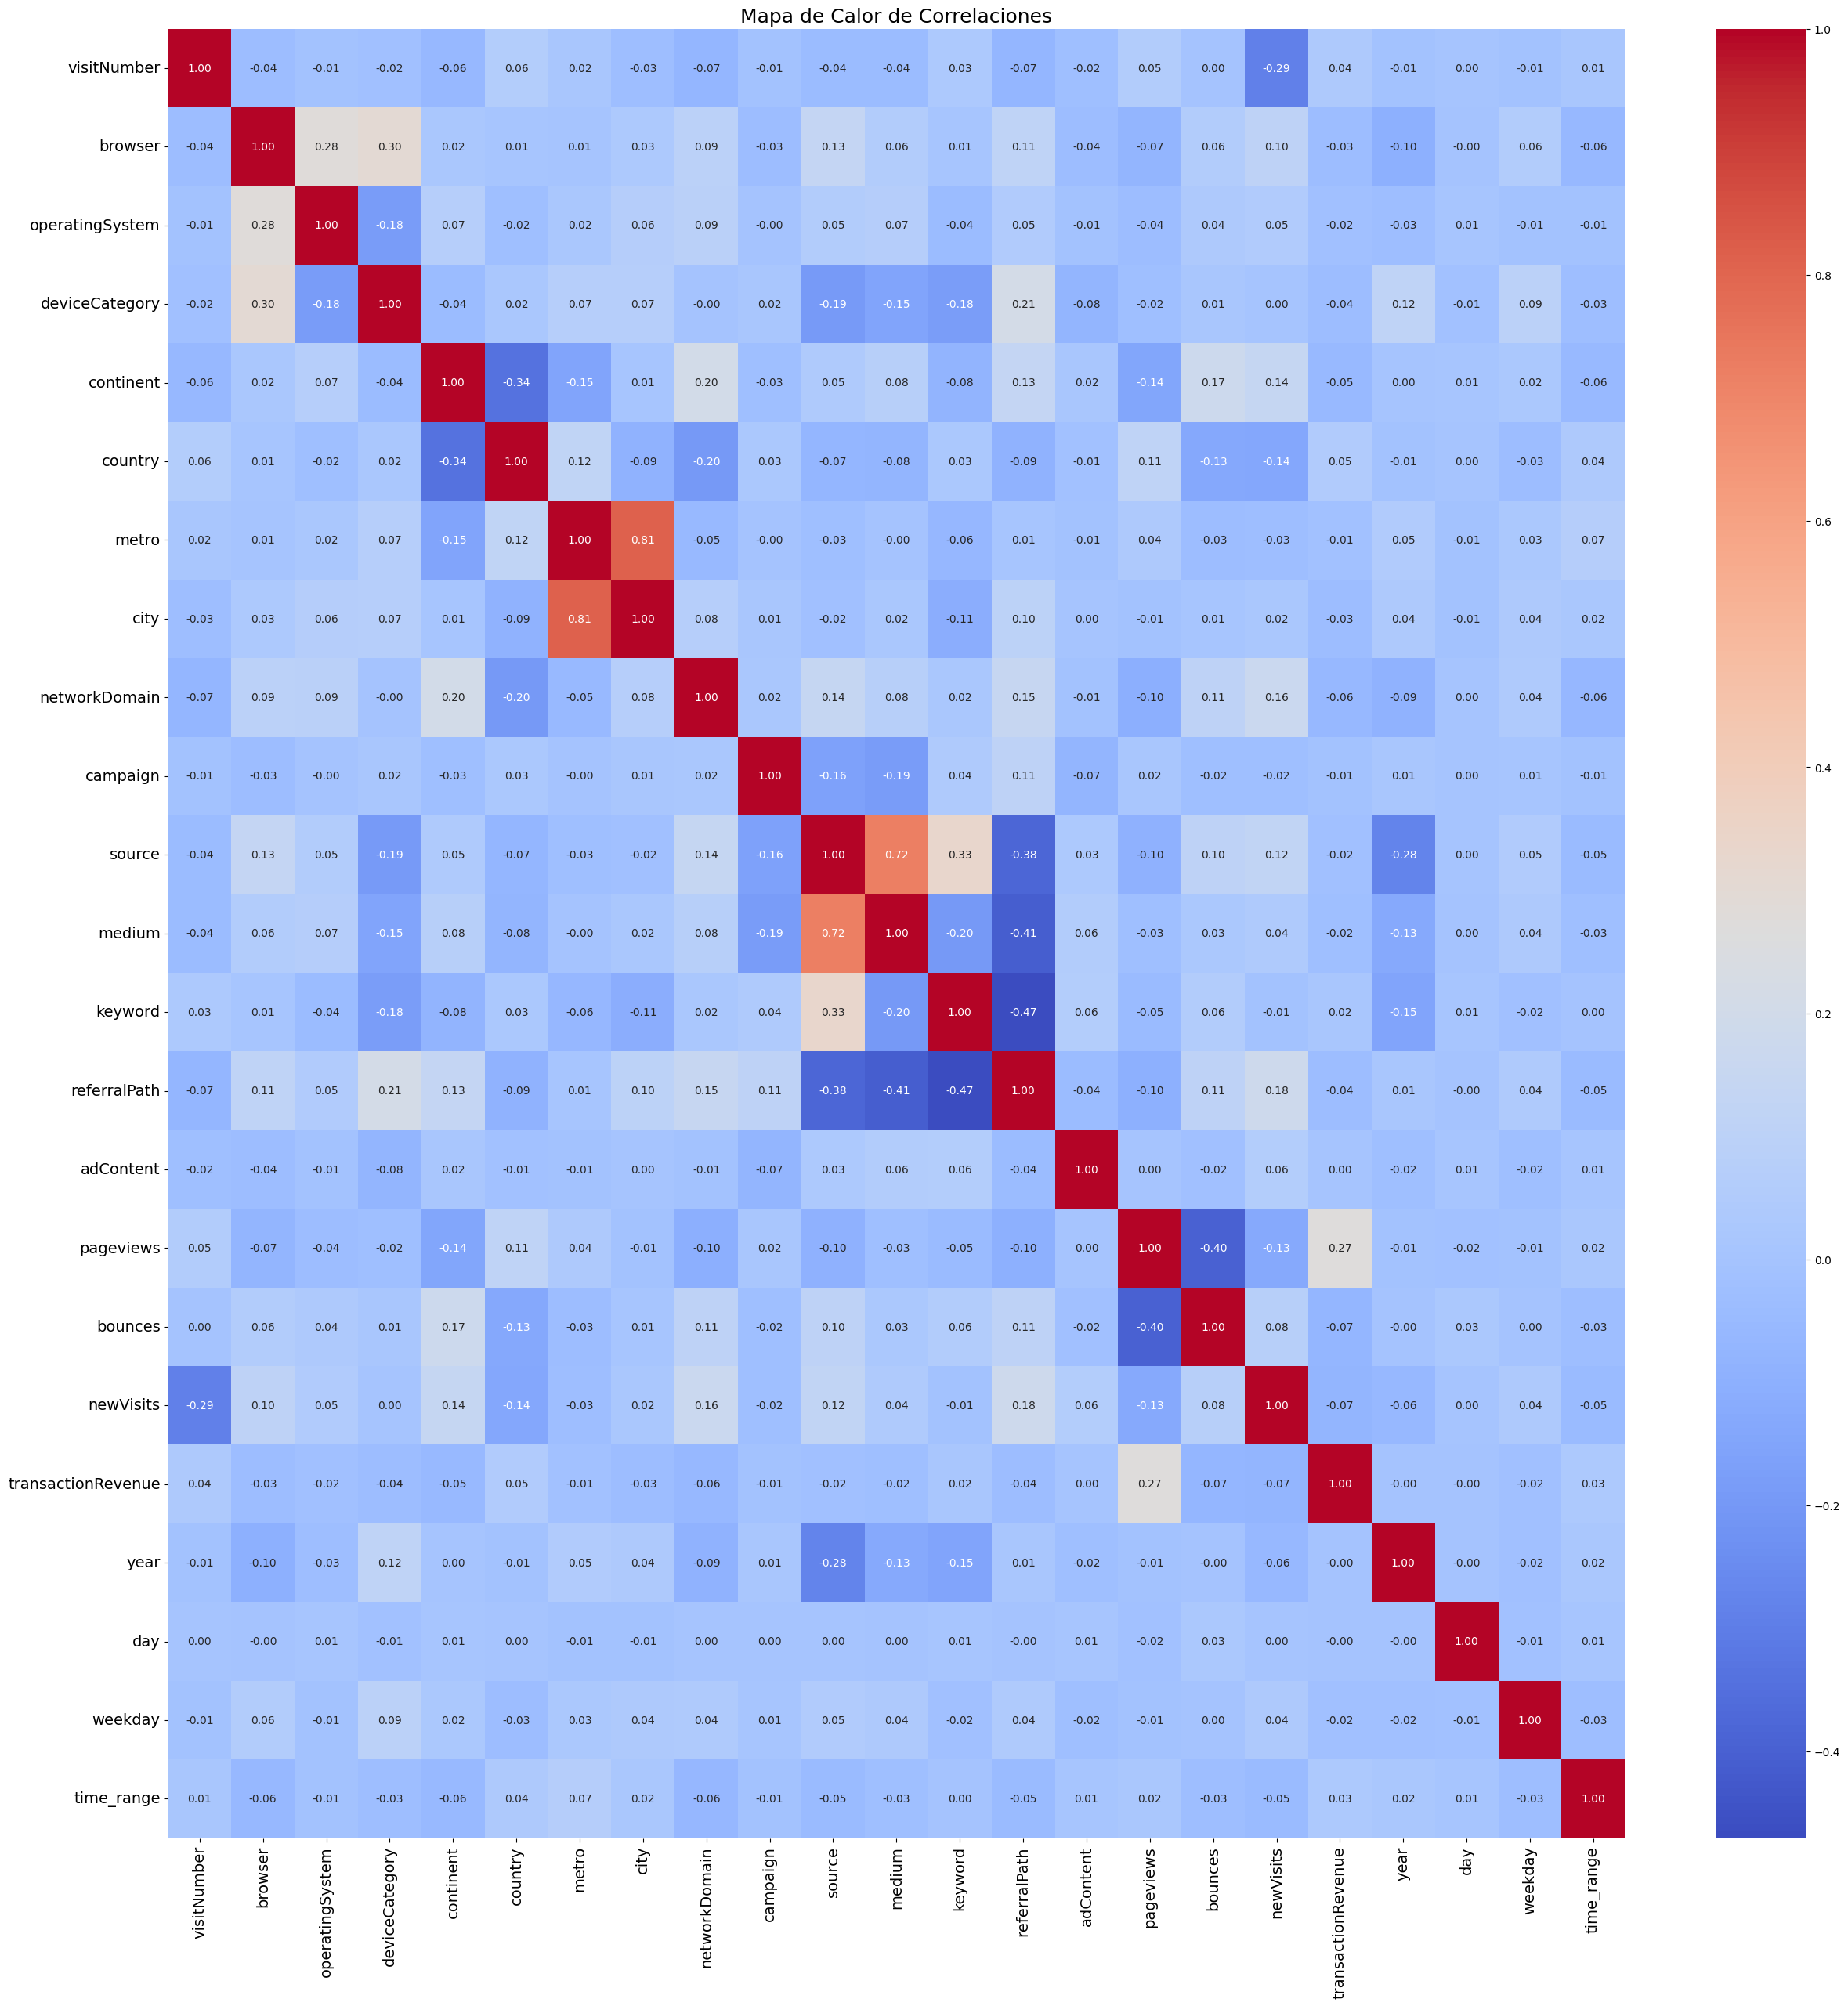

In [85]:
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(df_traffic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
heatmap.tick_params(axis='both', which='major', labelsize=14)
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

In [86]:
df_traffic = df_traffic_copy.copy()
df_traffic.to_csv('df_after_feature_engineering.csv', sep=';', index=False)

In [87]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitNumber         12283 non-null  int64  
 1   browser             12283 non-null  int32  
 2   operatingSystem     12283 non-null  int32  
 3   deviceCategory      12283 non-null  int32  
 4   continent           12283 non-null  int32  
 5   country             12283 non-null  int32  
 6   metro               12283 non-null  int32  
 7   city                12283 non-null  int32  
 8   networkDomain       12283 non-null  int32  
 9   campaign            12283 non-null  int32  
 10  source              12283 non-null  int32  
 11  medium              12283 non-null  int32  
 12  keyword             12283 non-null  int32  
 13  referralPath        12283 non-null  int32  
 14  adContent           12283 non-null  int32  
 15  pageviews           12283 non-null  int64  
 16  boun

In [88]:
df_traffic.value_counts(df_traffic['transactionRevenue'] != 0)

transactionRevenue
False    12119
True       164
Name: count, dtype: int64